## CONTEXT 

#Geography : USA,Sri-lanka & Pakistan
#Time Period : jan-dec 2016
#Unit of analysis : Drives
#Total Drives : 1,155
#Total Miles : 12,204    

The dataset contains start date,end date ,start location,miles driven and purpose of drive (business,personal,meals,meetings)

In [1]:
##ANALYSIS & MATHEMATICAL LIBRARIES

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
#VISUALIZING LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##TIME DATE LIBRARIES
import time,datetime

In [6]:
#ESCAPE WARNINGS`
import warnings
warnings.filterwarnings('ignore')

In [7]:
#READ THE DATA
df=pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Data Science\My Uber Drives - 2016.csv",encoding='Latin1')

In [8]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
#REMOVE THE SPECIAL CHARACTERS
df.columns=df.columns.str.replace("*","")

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
##INFO OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [12]:
##From above info we get to know that the purpose column has many null values 

In [13]:
#Number of rows and columns
df.shape

(1156, 7)

In [14]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## HANDLING THE MISSING VALUES 

In [15]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [16]:
df.isnull().sum().sum()

507

In [17]:
#data has 507 missing values

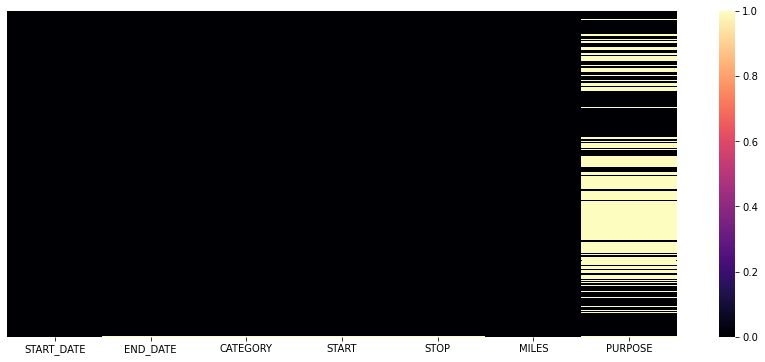

In [18]:
##VISUALISING THE NULL VALUES
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [19]:
##From above plot we get to know that PURPOSE column has many missing values 

In [20]:
##ANOTHER METHOD TO VISUALISE THE ATTRIBUTES
!pip install missingno 

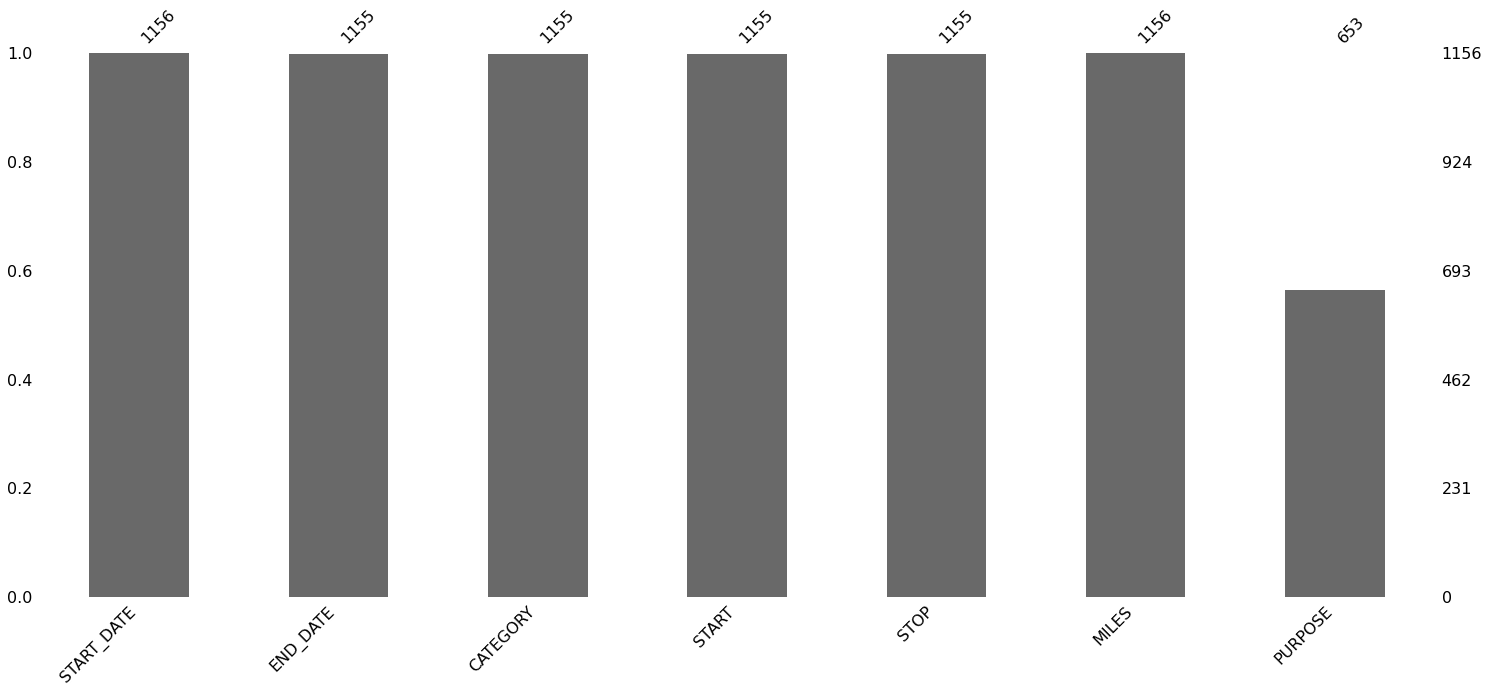

In [21]:
import missingno as msno
msno.bar(df)
plt.show()

In [22]:
#Any null values columns are displayed 
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [23]:
#Dropping the null values
df.drop(index=1155,axis=0,inplace=True)

In [24]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [25]:
df['PURPOSE'].isnull().sum()/len(df)

0.43463203463203465

In [26]:
##Forward filling
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [27]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [28]:
df["START_DATE"]=pd.to_datetime(df["START_DATE"],errors='coerce')
df["END_DATE"]=pd.to_datetime(df["END_DATE"],errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


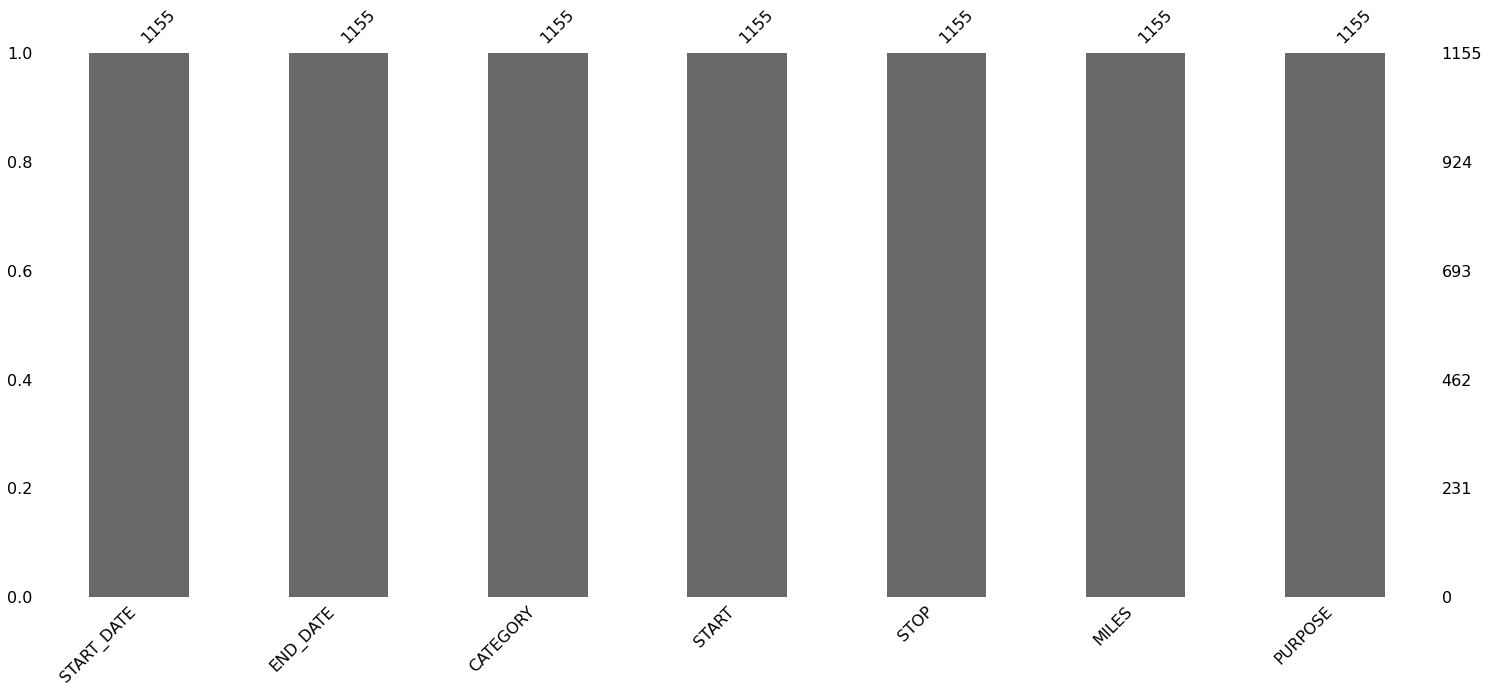

In [31]:
msno.bar(df)
plt.show()

In [32]:
##Business and Personal count of travel 
category=pd.crosstab(index=df['CATEGORY'],columns='count of travel as per category')
category

col_0,count of travel as per category
CATEGORY,
Business,1078
Personal,77


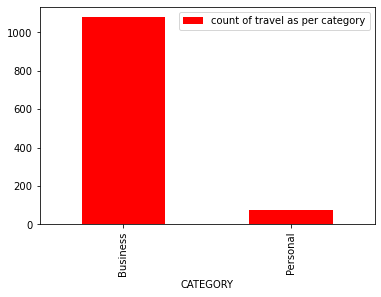

In [33]:
category.plot(kind='bar',color='r')
plt.legend()

In [34]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [35]:
##which place is the start point of many people
Start_Point=df.START.value_counts() 
Start_Point
print(Start_Point[Start_Point>10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
R?walpindi           11
Kenner               11
Kissimmee            11
Name: START, dtype: int64


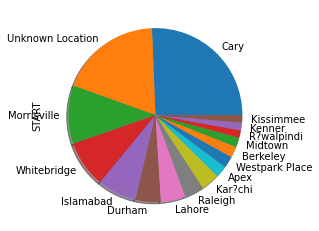

In [36]:
Start_Point[Start_Point>10].plot(kind='pie',shadow=True)
plt.show()

In [37]:
print([Start_Point<=10])

[Cary                         False
Unknown Location             False
Morrisville                  False
Whitebridge                  False
Islamabad                    False
                             ...  
Wake Co.                      True
Bellevue                      True
South Berkeley                True
Marigny                       True
Arlington Park at Amberly     True
Name: START, Length: 177, dtype: bool]


In [38]:
#which places are the most stop points

In [39]:
Stop_Point=df.STOP.value_counts()
Stop_Point
print(Stop_Point[Stop_Point>10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Westpark Place       16
Berkeley             16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64


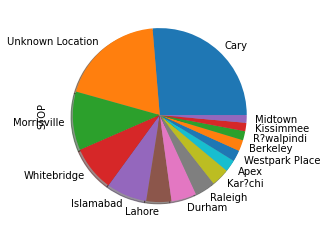

In [40]:
#Visualise the stop_points
Stop_Point[Stop_Point>10].plot(kind='pie',shadow=True)
plt.show()

In [41]:
print([Stop_Point<=10])

[Cary                False
Unknown Location    False
Morrisville         False
Whitebridge         False
Islamabad           False
                    ...  
College Avenue       True
Hayesville           True
Marigny              True
Cory                 True
Eagle Rock           True
Name: STOP, Length: 188, dtype: bool]


In [42]:
##Check our MILES columns
miles=df.MILES.value_counts()
miles
print(miles[miles>10])

9.9     28
3.1     26
3.0     19
2.1     19
2.5     19
10.4    19
1.8     18
2.2     18
1.7     18
3.3     16
2.0     16
2.8     16
1.9     16
3.8     15
6.1     15
5.5     14
1.4     14
7.9     13
1.6     13
6.2     12
2.9     12
2.7     12
5.7     12
2.3     12
1.5     12
6.0     11
1.0     11
7.7     11
5.1     11
4.9     11
Name: MILES, dtype: int64


<AxesSubplot:>

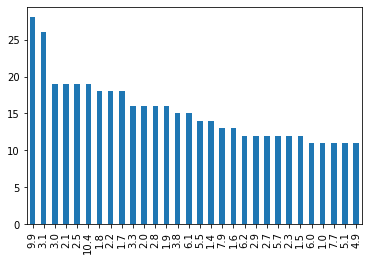

In [43]:
##Bar Plot
miles[miles>10].plot(kind='bar')

In [44]:
print(miles [miles<=10])

8.7      10
3.9      10
5.3      10
8.4      10
3.6      10
         ..
18.5      1
63.7      1
43.7      1
310.3     1
15.0      1
Name: MILES, Length: 226, dtype: int64


col_0,count of miles
MILES,
False,840
True,315


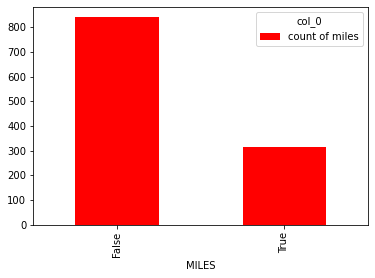

In [45]:
#distance travel not greater than 10(False) greater than 10(True)
miles=pd.crosstab(index=df['MILES']>10,columns='count of miles')
miles.plot(kind='bar',color='r')
miles

In [46]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64


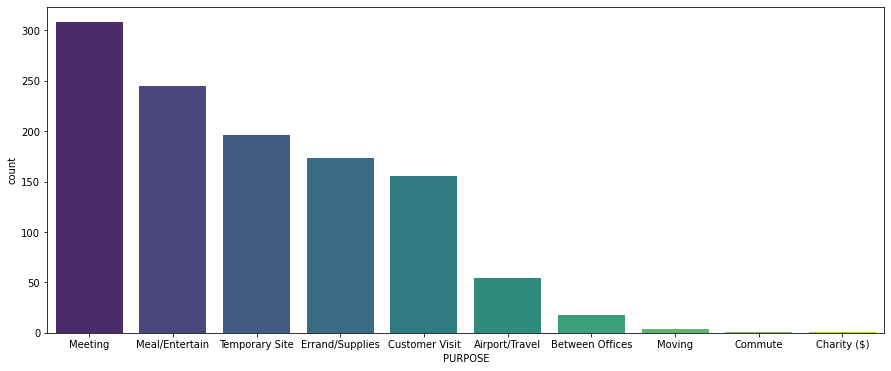

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order = df['PURPOSE'].value_counts().index,palette='viridis')
plt.show()

In [48]:
#Let us calculate the duration of ride
df['MINUTES']=df.END_DATE-df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [49]:
df['MINUTES']=df['MINUTES'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [51]:
#Grouping purpose by miles 
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),'Min':df.groupby(['PURPOSE'])['MILES'].min(),'max':df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

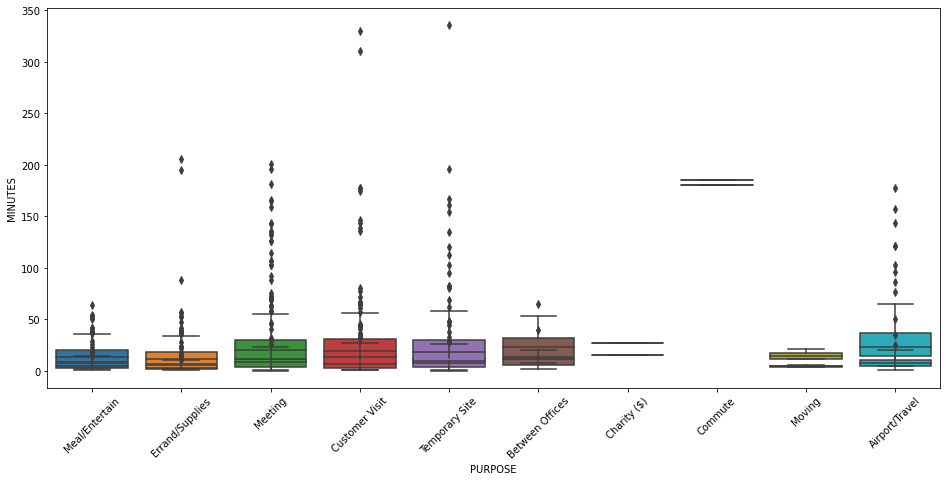

In [53]:
#Box Plot of MILES & MINUTES 
plt.figure(figsize=(16,7))
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

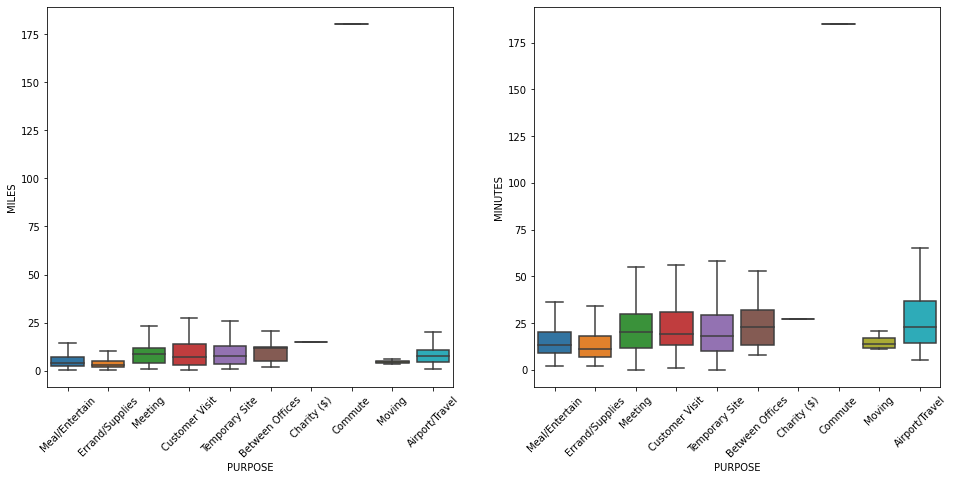

In [56]:
#Without the outliers(box plot) 
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45)

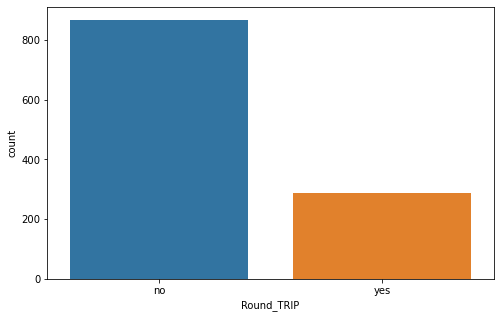

In [61]:
#checking how many round trips .i.e. start and stop points are same 
plt.figure(figsize=(8,5))
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['Round_TRIP']==df.apply(round,axis=1)
sns.countplot(df['Round_TRIP'],order=df['Round_TRIP'].value_counts().index)
plt.show()

In [63]:
##Entering month name and evaluating frequency of trip each month
df['month']=pd.DatetimeIndex(df['START_DATE']).month
dic={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['month']=df['month'].map(dic)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,Round_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


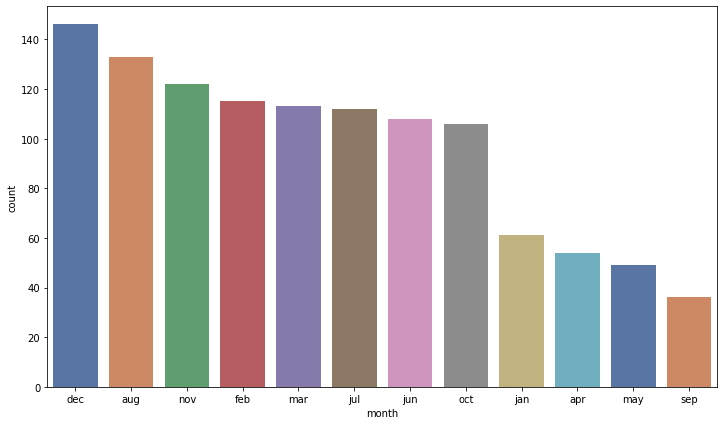

In [65]:
#visualising the data
plt.figure(figsize=(12,7))
sns.countplot(df['month'],order=df['month'].value_counts().index,palette='deep')
plt.show()

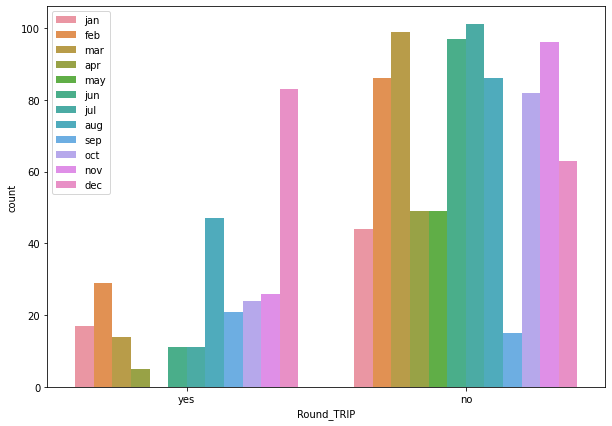

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(df['Round_TRIP'],hue=df['month'])
plt.legend()
plt.show()

<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

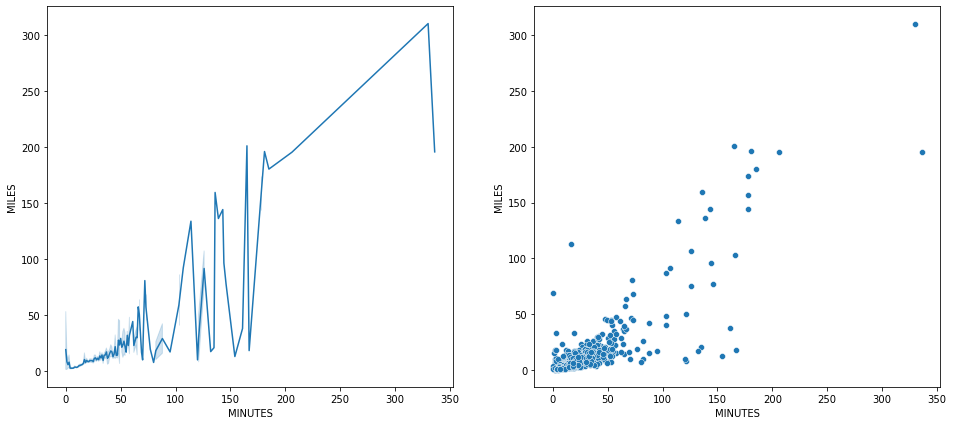

In [71]:
##Scatter Plot
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.MINUTES,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.MINUTES,y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

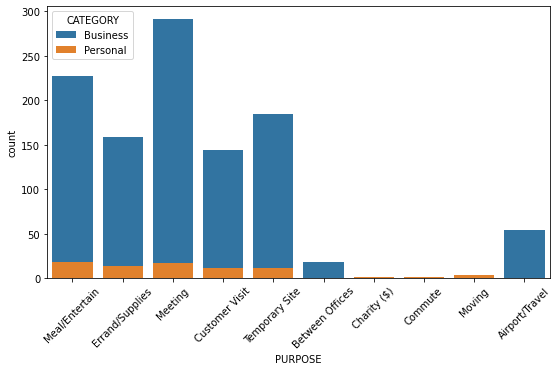

In [72]:
##Distribution of cab rides based in category
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Lahore'),
  Text(6, 0, 'Durham'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Westpark Place'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'New Orleans'),
  Text(16, 0, 'Kenner'),
  Text(17, 0, 'Edgehill Farms'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'San Francisco'),
  Text(21, 0, 'Oakland'),
  Text(22, 0, 'Banner Elk'),
  Text(23, 0, 'Colombo'),
  Text(24, 0, 'Downtown')])

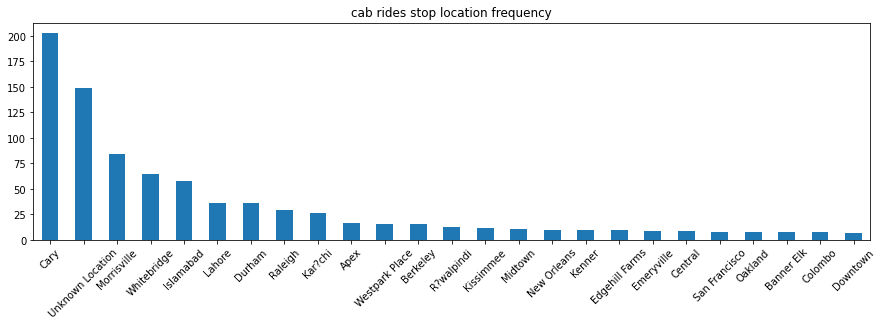

In [74]:
#Frequency of cab rides stop location
plt.figure(figsize=(15,4))
pd.Series(df['STOP'].value_counts()[:25].plot(kind='bar'))
plt.title('cab rides stop location frequency')
plt.xticks(rotation=45)

## CONCLUSIONS
1. Business cabs were not only used more in volumne but also have travelled more distance.
2. Round trips were more in decemnber
3. december can prove to be the best month for earning profit by raising fare as demand is more
4. seasonal pattern is there
5. Cab traffic was high in just 5 cities comparitevely
6. most of the cab rides are within a distance of 35 miles taking about 30 minutes
7. For Airport cabs are taking more time than usual.